# Numpy & Matplotlib

Importing packages:

if we want to use advanced python features, we need to import a library. For example, python comes with a library of math primitives:

In [1]:
#First, we need to import the standard python 
import math

#now we can use constants like math.pi or functions like math.sin
print(math.pi)
print(math.sin(0.0))

3.141592653589793
0.0


## A quick overview

We first start with a simple example using our knowledge from the previous session.
Our goal is to plot the function $f(x)=\sin(2 \pi x)$ for 100 values of x evenly spaced between 0 and 3. 
We will then already introduce matplotlib as a tool to create a nice plot. Then we will use numpy,
a python math library to simplify the code.

Why don't you give it a go yourself?
1. Implement a for loop that runs for i=0 to num_points-1
2. In the body of the loop compute the x-value according to $x_i=3\frac i {\texttt{num\_points}-1}$. (check: first x is 0 and last is 3)
3. Compute the y value $y_i= f(x_i)$. Remember you can import math symbols like sin or pi from the math package!
4. Begin by printing out the value
5. Then improve by creating a list of xs and ys such that xs[i] stores the value $x_i$ and ys[i] stores the value $y_i$. Try append!

In [1]:
num_points=100 
xs=[] #storing the grid of x values
ys=[] #storing the values of f(x)=sin(x) for each value in the grid
for i in range(num_points): #i takes values 0,1,...,num_points-1 (=99)
    #the ith value of x we generate. we can check that for i =0 the x value is 0 and for i=99 it is 3
    x = 3*i/(num_points-1)
    #we can just compute the value sin(x) using math.sin
    y = math.sin(2*math.pi*x)
    #store both values in the arrays
    xs.append(x)
    ys.append(y)

We could use print() to show the values. But we would like to have a nice graph. There are several python libraries to do this.
We use matplotlib in the following since it is used by most programs. For this we need to install a library called matplotlib from the standard python channels.

In [2]:
#run one of the below. The first uses the package channel by anaconda, the secend the python pip standard library channel.
#%conda install matplotlib
#%pip install matplotlib

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: linux-64
- 
Note: you may need to restart the kernel to use updated packages.


Now we can load the package. The plotting routines are in a subpackage of matplotlib. so we import the subpackage matplotlib.pyplot. Since this is a looooong name, we use "as" to define a shorter name for it: plt.

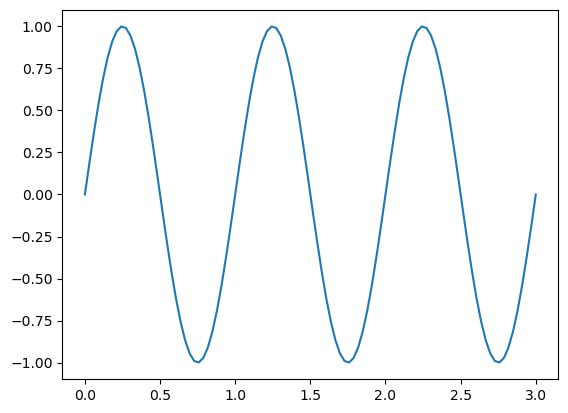

In [2]:
import matplotlib.pyplot as plt
#The first command we use is a simple plot. It creates a standard line plot. 
#We can call plot in many different ways, but the simplest one is just providing it with two lists
#of x and y values:
plt.plot(xs,ys)

## Showcasing numpy

We can write the program above much more concise using numpy

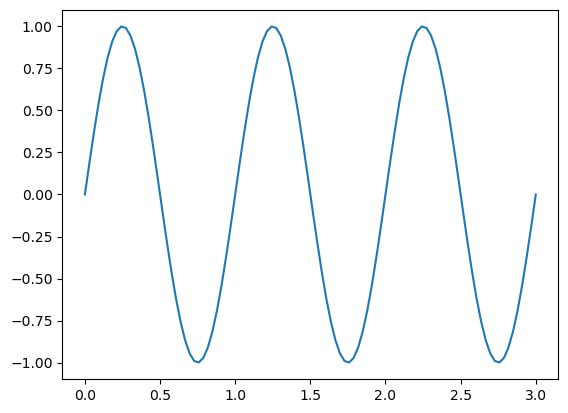

In [2]:
import numpy as np#we use np as a shorthand for numpy by convention. This is used universally in almost every project!
import matplotlib.pyplot as plt #plt is the almost universal shorthand used for matplotlib.pyplot!

num_points=100
#first, we generate our evenly spaced grid of x values between 0 and 3 (both inclusive). Numpy has a build-in tool for that!
xs=np.linspace(0,3,num_points)
#numpy implements a large number of math functions which apply the function to all elements in the list simultaneously
#typically we can convert a math expression just by replacing all "math." by "np."
ys=np.sin(2*np.pi*xs)

#and now we can plot it as before!
plt.plot(xs,ys)

# An Introduction to Numpy

As we have seen, numpy can make it easier to write math expressions in a concise way. Numpy can be seen as a library consisting of two parts:
1. An array datatype to store data
2. A library of functions that can effectively transform this data.

Numpy has greatly shaped scientific landscape. Not only is numpy easier to read and very often significantly faster than using loops, it is also used and supported by almost every numerical python package (scipy, sympy, sk-learn,pandas...). It is so influential that even modern GPU math libraries closely mirror the numpy library functions (e.g., pytorch). So let us dive into the basics!

## Numpy Arrays: Basics

The basic numpy datatype is an array. We can simply create it from a standard list of numbers

In [4]:
values = np.array([1,2,3,4])

We can print the contents of an array as usual:

In [5]:
print(values)

[1 2 3 4]


We can query the number of elements of the array in two ways.

In [6]:
len(values)

4

In [7]:
values.shape

(4,)

As we can see, the return value of shape is not a number but a tuple that has one element. We will see later, why.

Similar to a list, we can access elements in an array using the operator[]

In [8]:
#first element
values[0]

1

In [9]:
#last element
values[-1]

4

In [10]:
#getting a sliced sub array of the second and third element. note that the output indicates that we have a numpy array. This is because we do not use print() here.
values[1:3]

array([2, 3])

In [11]:
#slices also do not need both values
values[:3]

array([1, 2, 3])

In [12]:
#numpy also supports "fancy" indexing. We can explicitely ask to get the elements with index 0 and 2.
values[[0,2]]#requires a list object of integer values

array([1, 3])

Next, every array has a datatype, or dtype. Arrays only store values of a single type.

In [13]:
values.dtype

dtype('int64')

This means the values stored are all 64 bit integers. This is because we created the array from four integer numbers. We can control the data type at array creation in two ways:

In [60]:
values_float1 = np.array([1.0,2.0,3.0,4.0]) #way 1: provide a list of floating point numbers
values_float2 = np.array([1,2,3,4],dtype=np.float64) #way 2: tell the array that it should convert the provided list values to 64bit floating point
print(values_float1.dtype, values_float2.dtype)
print(values_float1) # note that the print out is no longer [1 2 3]

float64 float64
[1. 2. 3. 4.]


**Task:** Solve Assignment 1 using the tools introduced above!

Data types are important! Numpy checks at several steps whether the data type makes sense for an operation.
For example, we can do fancy indexing with integer arrays, but not with float!

In [15]:
wrong_index_type=np.array([0.0,2.0])#dtype=Float64
values[wrong_index_type]

IndexError: arrays used as indices must be of integer (or boolean) type

In [16]:
right_index_type=np.array([0,2])#dtype=Int64
values[right_index_type]

array([1, 3])

The error message says we can also have a boolean type! This allows us to do fancy indexing by deciding for each element whether we want to keep it

In [17]:
boolean_choice= np.array([True, False, True, False]) #elements at position 0 and 2 are kept
print(boolean_choice.dtype)
values[boolean_choice]

bool


array([1, 3])

## Numpy Arrays: Creation

So far, we can only create arrays from a list. but numpy has a few helper functions to create a few standard arrays. All creation methods allow to specify the dtype. We only mention it here once, it works the same for all examples below.

In [18]:
all_zeros=np.zeros(4) #an array with 4 zeros 
all_zeros_int=np.zeros(4,dtype=np.int64) #an array with 4 zeros where all values are integer
print(all_zeros, all_zeros_int)
print(all_zeros.dtype, all_zeros_int.dtype)

[0. 0. 0. 0.] [0 0 0 0]
float64 int64


In [19]:
same_values = np.full(4,2) #create an array of 4 copies of the value 2.0. dtype is taken as the same type as the value.
all_ones=np.ones(4)#same as np.full(4,1.0)
print(all_ones)
print(same_values)

[1. 1. 1. 1.]
[2 2 2 2]


In [20]:
#evenly spaced grid (by default this gives floating point numbers)
grid = np.linspace(0,3,4) 
grid

array([0., 1., 2., 3.])

In [21]:
#We can also have a log spaced grid 
log_grid_base_10=np.logspace(-2,2,5)
log_grid_base_2=np.logspace(-2,2,5,base=2)
print(log_grid_base_10)
print(log_grid_base_2)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[0.25 0.5  1.   2.   4.  ]


Numpy also has a library of random number generators which are part of the numpy.random package. We can use it to draw
random normal distributed numbers.

In [22]:
normal_numbers=np.random.randn(4)
normal_numbers

array([-1.03153951, -0.62244872,  0.43225506,  0.4203302 ])

## Numpy Arrays: Multidimensional

So far we have only created arrays that mimic a list. But there are many cases where we need multidimensional arrays. A typical example are matrices in linear algebra and numpy has a good support for matrix and vector operations. Again, we start by creating those arrays.

In most cases, we can just replace the size argument we used before by a tuple. For example:

In [23]:
zeros_mat=np.zeros((4,3))

As before we can query a bit of info about the geometry and print the array:

In [24]:
print("length: ", len(zeros_mat)) #the number of elements in the first index
print("shape: ", zeros_mat.shape)
print("number of dimensions: ", zeros_mat.ndim)
print("elements:")
print(zeros_mat)

length:  4
shape:  (4, 3)
number of dimensions:  2
elements:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


To support matrices, we also have functions to generate special matrices. For example the identity matrix!

In [25]:
identity=np.eye(4)
print(identity)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


We can also create a 2D array a list. For this we need to supply a list where each element is a list that holds the value of a row of the array.

In [26]:
mat=np.array([
    [1.0,2.0,3.0,4.0],
    [5.0,6.0,7.0,8.0],
    [9.0,10.0,11.0,12.0]
    ])
print("shape of mat:", mat.shape)
print("dimensions of mat:", mat.ndim)
print("elements:")
print(mat)

shape of mat: (3, 4)
dimensions of mat: 2
elements:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


# Numpy Arrays: Multidimensional Indexing
If an array has more than one dimension, to query the value of a single element, we now need multiple indices! Indexing works mostly intuitively including slicing. The only exception is fancy slicing, but we do not cover this today!

Indexing the element (2,2): 

In [27]:
mat[2,2]

11.0

If we only supply a single index, we obtain a row of a matrix

In [28]:
row=mat[1]
print("shape of row:", row.shape)
print("dimensions of row:", row.ndim)
print("elements:")
print(row)

shape of row: (4,)
dimensions of row: 1
elements:
[5. 6. 7. 8.]


If we want to index a column, we need slicing to tell it that we want to get all elements of the first index and a fixed value for the second

Note that numpy does not make a difference between rows and columns in its shape parameter: there are no row or column vectors in numpy!

In [29]:
col=mat[:,1]#: is the same as 0:4
print("shape of col:", col.shape)
print("dimensions of col:", col.ndim)
print("elements:")
print(col)

shape of col: (3,)
dimensions of col: 1
elements:
[ 2.  6. 10.]


Since len() gives the number of rows of a 2D array and supplying a single index returns an array, we can loop over the rows of a matrix:

In [30]:
for row in mat:
    print("row: ", row)

row:  [1. 2. 3. 4.]
row:  [5. 6. 7. 8.]
row:  [ 9. 10. 11. 12.]


We can also query the diagonal elements of a matrix using np.diag when we supply a two dimensional array as argument.
If we apply diag to a single dimensional array, we get a diagonal matrix with the elemnts on the diagonal! Note: diag also works on non-square matrices.

In [135]:
diagonal_elements = np.diag(mat)
print(diagonal_elements)
print(np.diag(diagonal_elements))

[ 1.  6. 11.]
[[ 1.  0.  0.]
 [ 0.  6.  0.]
 [ 0.  0. 11.]]


**Task:** Solve Assignment 2 using the tools introduced above!

## Array Copy and Modifications

We can copy an array easily:

In [31]:
mat_2=mat.copy()

We can use indexing to set elements of an array:

In [61]:
mat_2=mat.copy()
print(mat_2)
mat_2[0,1]=5
print(mat_2)
mat_2[1]=np.zeros(4)
print(mat_2)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[ 1.  5.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[ 1.  5.  3.  4.]
 [ 0.  0.  0.  0.]
 [ 9. 10. 11. 12.]]


And the original matrix is unaffected since mat_2 was a copy!

In [33]:
print(mat)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


**Task:** Solve Assignment 3 using the tools introduced above!

## Operations on arrays

Numpy supports a large number of mathematical operations for all array shapes and number of dimensionalities. This holds for the standard mathematical functions like 

abs,sin,cos,tan,exp,...

but also for the classical operators 

+,-,*,/,**

However, these operations are not linear algebra operations. The classical operators are all element-wise:


In [3]:
x=np.array([1.0,2.0,3.0])
y=np.array([2.0,4.0,6.0])
z=np.array([4.0,2.0,0.0,5.0])
A=np.array([
    [1.0,2.0,3.0,4.0],
    [5.0,6.0,7.0,8.0],
    [9.0,10.0,11.0,12.0]
    ])

elementwise operations

In [35]:
print(np.sin(x))
print(np.sin(A))

[0.84147098 0.90929743 0.14112001]
[[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825]
 [ 0.41211849 -0.54402111 -0.99999021 -0.53657292]]


We also have operations like sorting:

In [36]:
print("z", z)
print("sorted z:", np.sort(z))

z [4. 2. 0. 5.]
sorted z: [0. 2. 4. 5.]


In [37]:
print(x+y)
print(x*y)#not a matrix product! no inner/scalar product either! and also no tensor product!
print(x/y)
print(x**y)

[3. 6. 9.]
[ 2.  8. 18.]
[0.5 0.5 0.5]
[  1.  16. 729.]


We can also use numbers instead of vector arguments:

In [38]:
print(x+1)# same as x+np.ones(len(x))
print(x/2)
print(2/x)

[2. 3. 4.]
[0.5 1.  1.5]
[2.         1.         0.66666667]


But we cannot combine arrays of different lengths

In [39]:
x*z

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

**Task:** Solve Assignment 3 using the tools introduced above!

We can use operator +=,-=,*= and /= to implement shortcuts to operations like x=x+y via x+=y:

In [40]:
x_copy = x.copy() #copy to not overwrite our x for later.
print("x:", x_copy)
x_copy+=2 #add two to each element
print("x", x_copy)
#this also works with slices!
x_copy[:2]-=2 #subtract 2 from the first two elements
print("x", x_copy)

x: [1. 2. 3.]
x [3. 4. 5.]
x [1. 2. 5.]


We can use this for arbitrary arrays and even rows or subarrays!

In [41]:
A_copy = A.copy()
print("A")
print(A_copy)
A_copy[:,1] += x #add x to the second column
print("A")
print(A_copy)

A
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
A
[[ 1.  3.  3.  4.]
 [ 5.  8.  7.  8.]
 [ 9. 13. 11. 12.]]


Numpy also implements relational operators ==,!=,<=,>=,<,>

In [42]:
print("z", z)
print(z<3)

z [4. 2. 0. 5.]
[False  True  True False]


We can combine this with fancy indexing and element setting. For example, we can set all elements larger than 2 to 2!

In [43]:
print("z", z)
print("is z>2?", z>2)
print("Fancy indexing, values with z>2:", z[z>2])
z_limited = z.copy()
z_limited[z>2]=2
print("z limited to maximum 2", z_limited)

z [4. 2. 0. 5.]
is z>2? [ True False False  True]
Fancy indexing, values with z>2: [4. 5.]
z limited to maximum 2 [2. 2. 0. 2.]


Of course, Numpy has a function for this! The elementwise minimum of a vector with another vector (or scalar):

In [44]:
print("z limited to maximum 2", np.minimum(z,2))

z limited to maximum 2 [2. 2. 0. 2.]


In some applications, we want to know whether a relation holds for all elements, or at least one.

In [64]:
print(np.any(z<2))
print(np.all(z<2))

True
False


**Task:** Solve Assignment 5 using the tools introduced above!

## Linear Algebra support: basics

Let us get back to linear algebra. An important operation is matrix transposition.

In [ ]:
print("A original:")
print(A)
print("A transposed:")
print(A.T)
print("A shape", A.shape)
print("A transposed shape", A.T.shape)

Warning: A*z is a valid operation, but is not a matrix product! it multiplies each row of A with z! (This is called "broadcasting")

This is a common beginner mistake!


In [62]:
print("shapes of A, z:", A.shape, z.shape)
print("A")
print(A)
print("z", z)
print(A*z)

shapes of A, z: (3, 4) (4,)
A
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
z [4. 2. 0. 5.]
[[ 4.  4.  0. 20.]
 [20. 12.  0. 40.]
 [36. 20.  0. 60.]]


How does numpy support matrix multiplication if "*" is not a matrix product?

Matrix-multiplication uses the new operator "@"

In [46]:
print("shapes of A, z:", A.shape, z.shape)

A@z

shapes of A, z: (3, 4) (4,)


array([ 28.,  72., 116.])

Of course, we can also multiply vectors from the left!

In [63]:
print("shapes of A, x:", A.shape, x.shape)

x@A

shapes of A, x: (3, 4) (3,)


array([38., 44., 50., 56.])

This operation fails, if we do supply a second argument with the wrong shape:

In [47]:
print("shapes of A, y:", A.shape, y.shape)

A@y

shapes of A, y: (3, 4) (3,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

Since numpy does not distinguish between row and column vectors, we need operations for the inner and outer products, that is

$x^Ty$ and $xy^T$

In [48]:
print("x", x)
print("y", y)
print("z", z)
print("inner product", np.inner(x,y))
print("outer product x,y")
print(np.outer(x,y))
print("outer product, x,z")
print(np.outer(x,z))

x [1. 2. 3.]
y [2. 4. 6.]
z [4. 2. 0. 5.]
inner product 28.0
outer product x,y
[[ 2.  4.  6.]
 [ 4.  8. 12.]
 [ 6. 12. 18.]]
outer product, x,z
[[ 4.  2.  0.  5.]
 [ 8.  4.  0. 10.]
 [12.  6.  0. 15.]]


Numpy also supports more advanced linear algebra primitives. For example, we can compute a matrix inverse:

In [68]:
B=np.random.randn(4,4)#create a 4x4 random matrix with normal distributed entries
B_inv=np.linalg.inv(B)
#test that it is an inverse
print(B_inv@B)

[[ 1.00000000e+00 -3.58178816e-16  5.78849738e-16  3.44827988e-16]
 [ 1.77690784e-17  1.00000000e+00  4.76167970e-17  2.29959879e-16]
 [ 4.71509955e-17  5.14973266e-17  1.00000000e+00 -6.86223008e-17]
 [ 2.79887143e-17 -1.45505252e-15  8.82849697e-17  1.00000000e+00]]


Or an eigenvalue decomposition:

In [70]:
pos_def_matrix=B@B.T # creating a symmetric positive definite matrix from B.
eigenvalues, eigenvectors=np.linalg.eigh(pos_def_matrix) #eigh assumes that its argument is symmetric
print("eigenvalues:", eigenvalues)
print("eigenvectors:")
#the eigenvectors are stored in the column of the matrix
for i in range(4):
    print(eigenvectors[:,i])


eigenvalues: [8.65503104e-03 1.00976404e+00 5.16060365e+00 1.85008291e+01]
eigenvectors:
[ 0.68097855 -0.44158937 -0.54004327  0.22275617]
[-0.45779116  0.28588669 -0.83908788 -0.06802633]
[-0.56272212 -0.81199058  0.01787701  0.15393354]
[-0.10019625  0.2528615   0.06296985  0.96023777]


**Task:** Solve either Assignment 6.1 or 6.2 using the tools introduced above!

# Array Reductions

An important set of operations are reductions. Reductions are operations that reduce the dimensionality of an array. The most important reductions are

sum,min,max

which take the elements of an array and either compute their total sum, or the minimum/maximum element

In [49]:
print("x", x)
print("sum of all elements of x", np.sum(x))
print("max of all elements of x", np.max(x))
print("min of all elements of x", np.min(x))

x [1. 2. 3.]
sum of all elements of x 6.0
max of all elements of x 3.0
min of all elements of x 1.0


Reductions also work on multidimensional arrays. By default they ignore the dimensions and just treat the array as a long vector
where the rows are concatenated one after another.

In [50]:
print("A")
print(A)
print(np.sum(A))

A
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
78.0


This is often not what we want. For example, we might want to sum all rows of the matrix together. For this purpose we need the "axis" argument and tell it over which dimension of the matrix we want to sum over. 

In [51]:
print(np.sum(A,axis=0)) #this is the same as A[0]+A[1]+A[2]
print(np.sum(A,axis=1)) #this is the same as A[:,0]+A[:,1]+A[:,2]

[15. 18. 21. 24.]
[10. 26. 42.]


Numpy has a few standard reductions which implement the computation of mean, variance and standard deviation of the elements in the array:

In [52]:
print("x", x)
print("mean of x:", np.mean(x))
print("variance of x:", np.var(x))
print("standard deviation of x:", np.std(x))

x [1. 2. 3.]
mean of x: 2.0
variance of x: 0.6666666666666666
standard deviation of x: 0.816496580927726


# Loading and storing numpy objects

We can use numpy to store and load files. We begin by loading files from CSV.

In [4]:
data=np.loadtxt("iris.csv", delimiter=',') #csv files use comma separated entries.
print(data)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

and also store it as csv

In [72]:
np.savetxt("iris_copy.csv", data, delimiter=',')

But numpy also has its own binary file format that allows to store complex objects and several matrices by name. Let us store the A,x,y arrays from before!

In [73]:
#we can provide several arrays as keyword arguments. "x=y" means: save array y under the name "x"
np.savez("arrays.npz", A=A,x=x, some_name=y)

In [78]:
#we load them again
arrays = np.load("arrays.npz")
print("names of stored arrays:", list(arrays.keys()))
A_load=arrays['A']
A_load

names of stored arrays: ['A', 'x', 'some_name']


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

## Advanced topics
This introduction only scrapes the surface of numpy. Important advancecd topics are:

1. Broadcasting (adding a lower dimensional array to each element of a higher dimensional array for each element along an axis)
2. Shape Modifications( modifying the dimensionality structure of an array: flatten a matrix to a long vector, or breaking up a long vector into rows of a matrix)
3. Advanced construction: Stacking multiple vectors as rows of a matrix, repeating elements or submatrices, exchanging indices...
4. Random number generation, numpy.random
5. advanced linear algebra, numpy.linalg, numpy.fft, numpy.polynomials

In [9]:
#quick example for broadcasting
print("x", x)
print("z",z)

#we can ask numpy to add an axis of length 1 via indexing with "None" at the right position
print("x 2D:", x[None,:].shape)
print("z 2D:", z[:,None].shape)
#we can add as many axis as we want, anywhere!
print("x 3D:", x[None,:,None].shape)

#we can use broadcasting to compute the difference of all values in x and all values in y. 
#broadcasting in numpy reinterprets axes with length one as "this axis can be expanded to any length by duplicating the value stored")
print(x[None,:]-z[:,None])

x [1. 2. 3.]
z [4. 2. 0. 5.]
x 2D: (1, 3)
z 2D: (4, 1)
x 3D: (1, 3, 1)
[[-3. -2. -1.]
 [-1.  0.  1.]
 [ 1.  2.  3.]
 [-4. -3. -2.]]


# Matplotlib

We have already seen that we can matplotlib to create simple graphs. Let us return to the initial example and improve the graph a little:

In [53]:
num_points=30
xs=np.linspace(0,3,num_points)
ys=np.sin(2*np.pi*xs)/(xs+1)
ys_2=np.sin(4*np.pi*xs)/(xs+1)


We can plot multiple functions on a single graph easily:

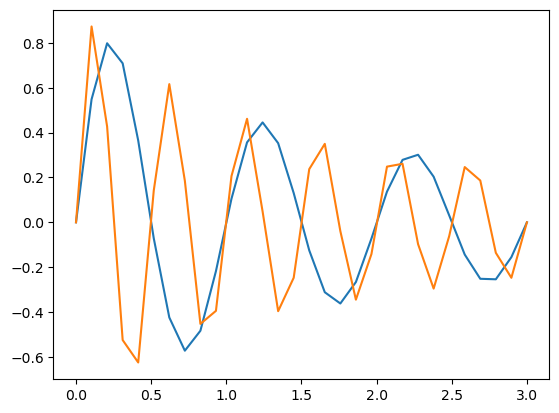

In [54]:
plt.plot(xs,ys)
plt.plot(xs,ys_2)

There are several issues with the plot:
1. We do not know which curve is which! We need a labeled legend!
2. We need axis descriptions!
3. While there are different colours for both graphs, we can not choose them.
4. We currently plot lines, but we cannot see the actual measured points clearly.

We will try to improve on this one after another!

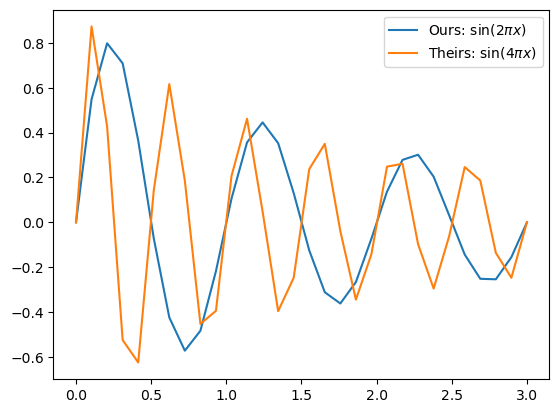

In [55]:
#adding a legend requires us to add a label to each graph we plot. Matplotlib even supports latex labels!
plt.plot(xs,ys, label="Ours: $\\sin(2\\pi x)$") #the part in $$ is treated as latex! we only need to replace all \ by \\
plt.plot(xs,ys_2, label="Theirs: $\\sin(4\\pi x)$")
plt.legend() # we need to ask plt to generate a legend. Only plot commands with a "label" will obtain a legend line.

(-1.0, 1.0)

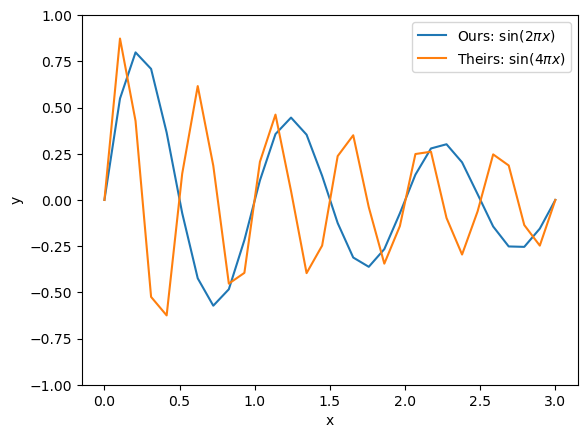

In [56]:
#Adding an axis description is easy! we can add xlabel and ylabel commands. We can also set limits for x and y axis if we dislike the default limits!

#as before
plt.plot(xs,ys, label="Ours: $\\sin(2\\pi x)$")
plt.plot(xs,ys_2, label="Theirs: $\\sin(4\\pi x)$")
plt.legend()

#new:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1) #change y axis to [-1,1]

(-1.0, 1.0)

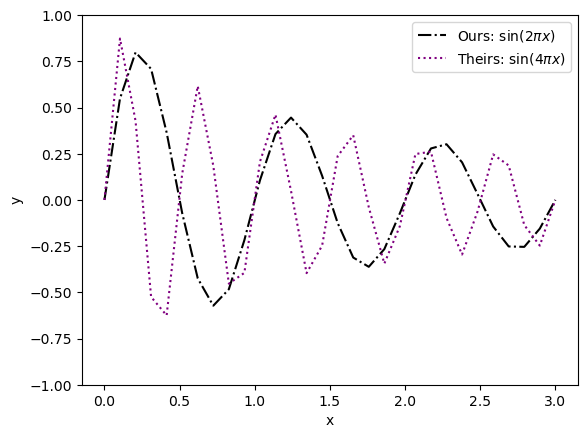

In [57]:
#adding colour can be done by adding a color name "c=black". We can also change the line style via a string. 
#we can choose for ls: '-' (solid,default),'--' (dashed), '-.' (dash dotted), ':' (dotted)
 

plt.plot(xs,ys, ls="-.",c="black", label="Ours: $\\sin(2\\pi x)$")
plt.plot(xs,ys_2, ls=':', c="purple", label="Theirs: $\\sin(4\\pi x)$")

#as before
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1) #change y axis to [-1,1]

While this is now looking different, we still do not have what we wanted! We originally wanted to have crosses at the point where we had our data points, but dash-dotted lines do not put a '.' at the position of the data. For this, we need a different plotting function! plt.scatter! Instead of drawing lines, like plot, it just produces points at the given (x,y) coordinates!

(-1.0, 1.0)

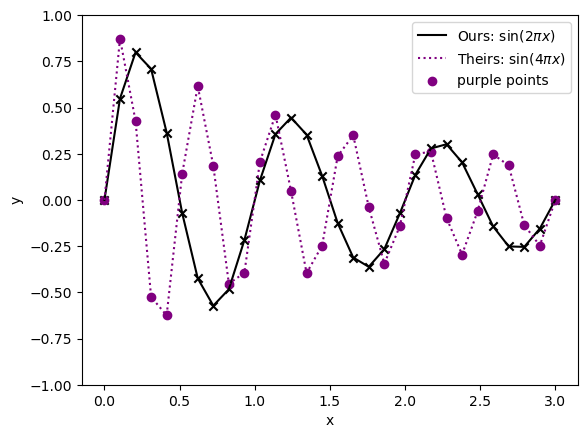

In [58]:
#dashdot would not look good here, so we change it to solid again (or just remove the ls argument)
plt.plot(xs,ys, ls='-',c="black", label="Ours: $\\sin(2\\pi x)$")
plt.plot(xs,ys_2, ls=':', c="purple", label="Theirs: $\\sin(4\\pi x)$")
#adding the scatter. it can also take label, colour and marker style arguments.
#marker changes the style of the points, e.g., "x" produces an "x". The default is a point.
plt.scatter(xs,ys, c="black", marker='x')
plt.scatter(xs,ys_2, c="purple", label="purple points")

#as before
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1)

Finally, we would like to change the figure size. We currently use the default figure size with the default dpi. Journals often require either high dpi png pictures. Further, for our article we might have a certain figure size in mind. If we set the figure size correctly, then matplotlib will ensure that all texts are scaled to be legible at that size. So let us change that and store the figure as png.



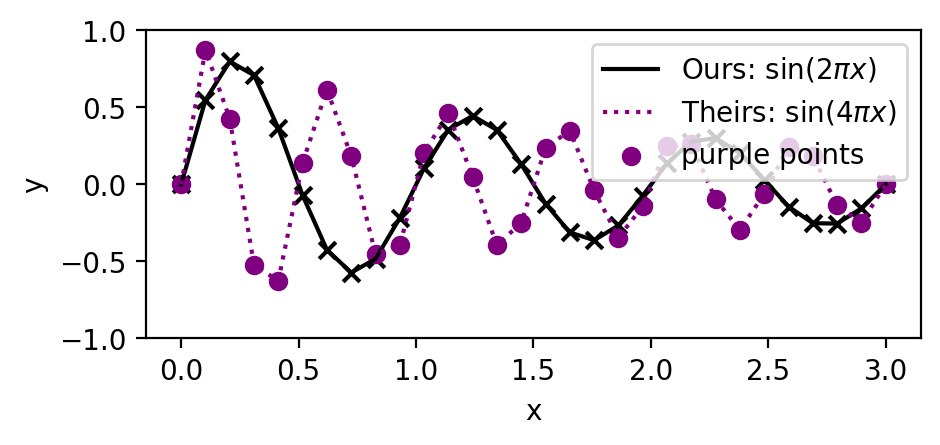

In [59]:
plt.figure(figsize=(5,2),dpi=200) #figsize=(width,height) in inch.
#as before
plt.plot(xs,ys, ls='-',c="black", label="Ours: $\\sin(2\\pi x)$")
plt.plot(xs,ys_2, ls=':', c="purple", label="Theirs: $\\sin(4\\pi x)$")
plt.scatter(xs,ys, c="black", marker='x')
plt.scatter(xs,ys_2, c="purple", label="purple points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1)

#save it
plt.savefig("figure.png") #changing the extension to .svg/.eps/.pdf produces a vector graphic

# Using Matplotlib for 2D Data.

The easiest case is if we have data on a regular grid of coordinates. Let us first generate some data.

In [108]:
#data generation. We want to generate data with x,y coordinates on a regular grid

xs=np.linspace(-20,0,21)
ys=np.linspace(15,-15,31)

#we now need to generate an array of all combinations of these values.
grid_xs,grid_ys = np.meshgrid(xs,ys)
print("grid shape:", grid_xs.shape, grid_ys.shape)
print(grid_xs[:3,:3])
print(grid_ys[:3,:3])

#and square it
result=(grid_xs+grid_ys)**2

grid shape: (31, 21) (31, 21)
[[-20. -19. -18.]
 [-20. -19. -18.]
 [-20. -19. -18.]]
[[15. 15. 15.]
 [14. 14. 14.]
 [13. 13. 13.]]


Now we can show different plotting ways. The simplest way is given by pcolormesh. It uses a color mapping to visualize values.

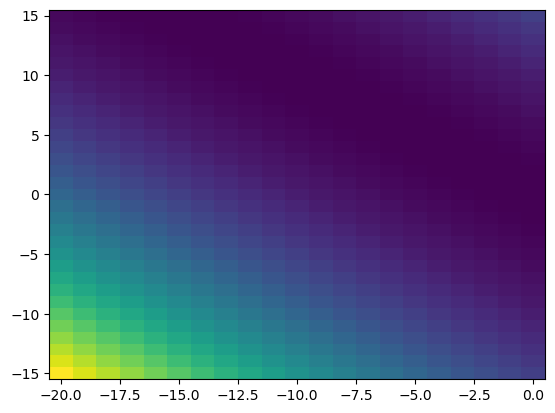

In [109]:
plt.pcolormesh(grid_xs,grid_ys,result,shading='nearest')

To make this useful, we need to add a colorbar that shows which colors are which value. We can not just add it. 
We need to tell matplotlib which plotting objects needs a colorbar:

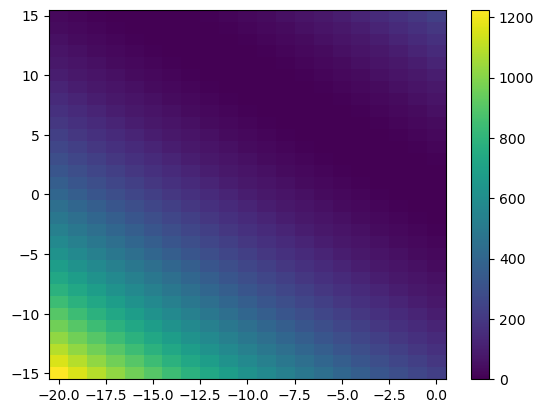

In [110]:
obj=plt.pcolormesh(grid_xs,grid_ys,result,shading='nearest')
plt.colorbar(obj)

We can also add axis descriptions as before, but we skip it here.

Sometimes we do not have a grid and just 2D data. In this case, we can use imshow

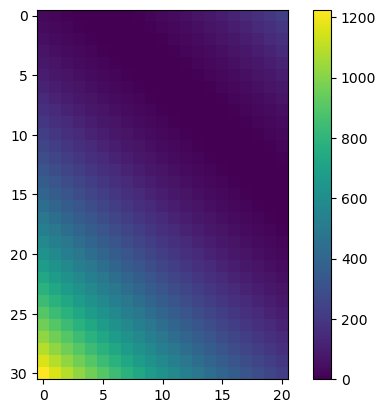

In [115]:
obj=plt.imshow(result)
plt.colorbar(obj)

The axes are all wrong and show the index of the array as position. We need to fix this by telling imshow what the dimensions are in x and coordinates.
By default imshow will keep pixels square, so we tell it to adaopt the aspect ratio to the axes.

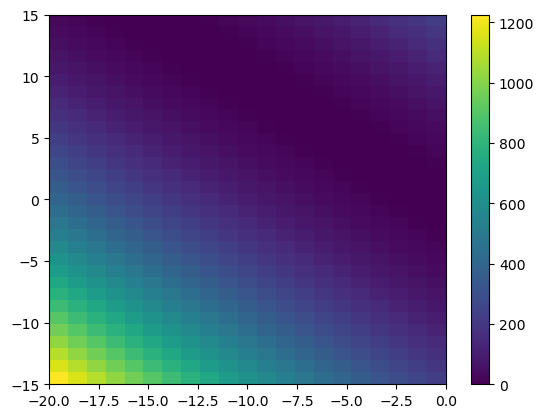

In [116]:
obj=plt.imshow(result,extent=[-20,0,-15,15], aspect='auto') #extent=[left,right,bottom,top]
plt.colorbar(obj)

We can also use contour plots:

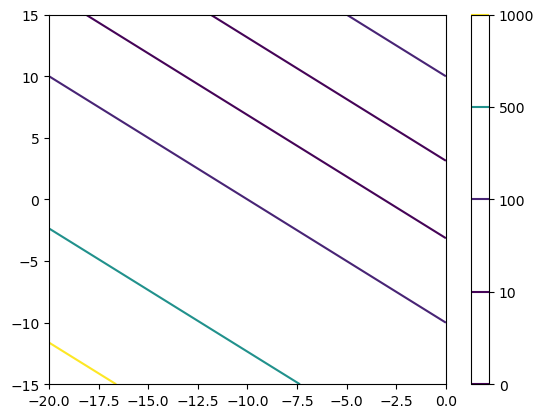

In [124]:
obj=plt.contour(grid_xs,grid_ys,result,levels=[0,10,100,500,1000])#plot contour lines for values given in levels
plt.colorbar(obj)


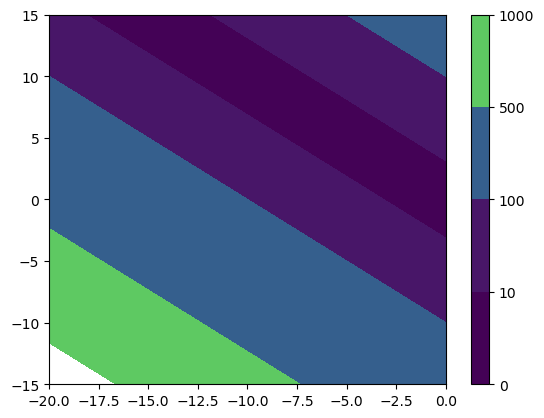

In [125]:
obj=plt.contourf(grid_xs,grid_ys,result,levels=[0,10,100,500,1000])#plot contour lines for values given in levels
plt.colorbar(obj)

They can be combined. For example we can overlay the grid with contour lines

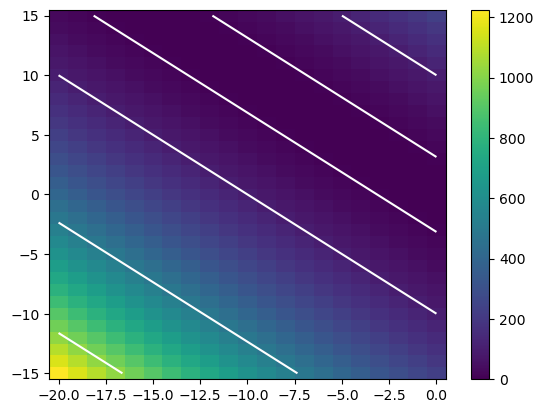

In [132]:
obj=plt.pcolormesh(grid_xs,grid_ys,result,shading='nearest')
plt.contour(grid_xs,grid_ys,result,colors="white",levels=[0,10,100,500,1000])
plt.colorbar(obj)